In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
df=pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

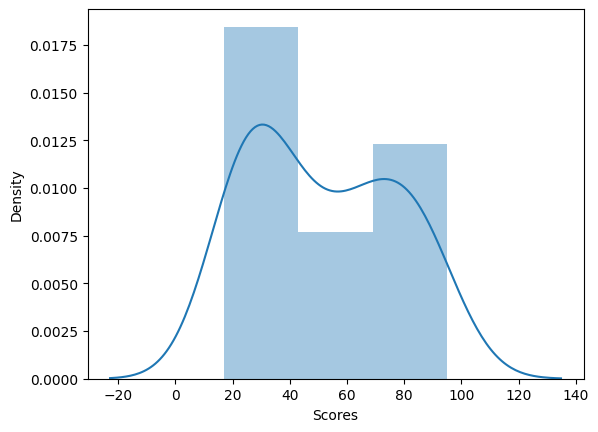

In [7]:
# Visuualization

sns.distplot(df['Scores'])
plt.show()

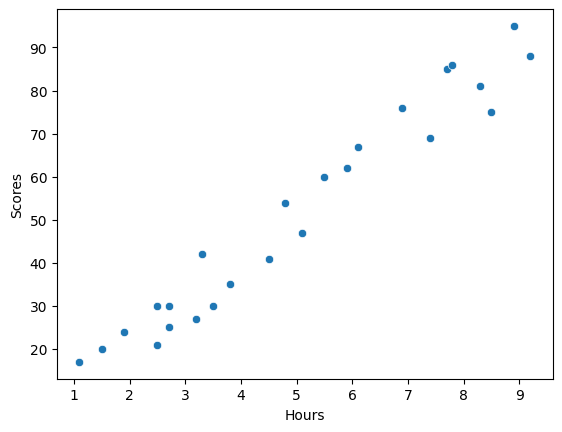

In [8]:
plt.figure()
sns.scatterplot(data=df,x='Hours',y='Scores')
plt.show()

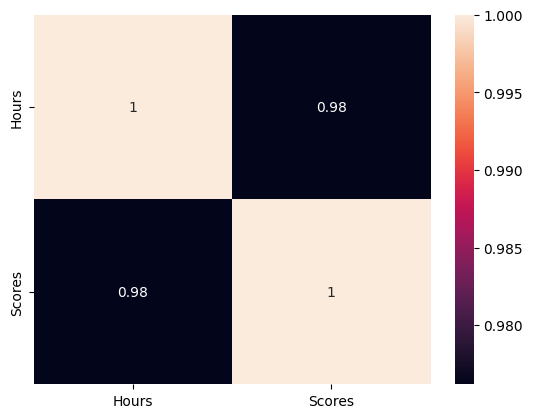

In [9]:
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
#Linear Regression

x=df['Hours']
y=df['Scores']

In [11]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [12]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [13]:
lr.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

In [14]:
lr.intercept_

-1.5123061161277889

In [15]:
lr.coef_

array([10.41075981])

In [16]:
# Predicted Value

y_pred=lr.predict([[10.5]])
y_pred

array([107.80067189])

In [17]:

y_pred = lr.predict(np.array(x_train).reshape(-1,1))
y_pred

array([34.92535322, 31.80212528, 26.59674537, 94.26668414, 55.74687284,
       38.04858116, 51.58256892, 24.51459341, 24.51459341, 91.1434562 ,
       79.6916204 , 70.32193658, 26.59674537, 84.89700031, 45.33611303,
       59.91117676, 14.1038336 ])

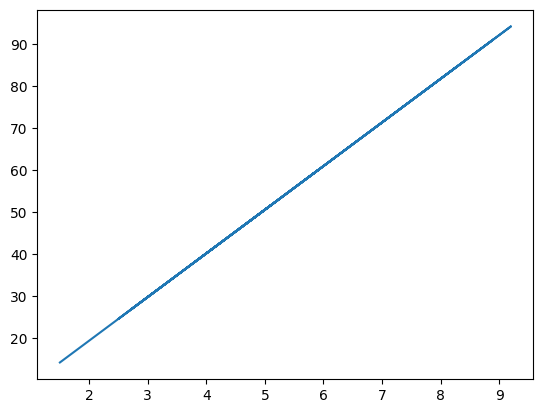

In [18]:
plt.figure()
#sns.scatterplot(x_train,y_train)
plt.plot(x_train,y_pred)
plt.show()

In [19]:
y_pred = lr.predict(np.array(x_test).reshape(-1,1))
y_pred

array([ 9.93952968, 32.84320126, 18.26813752, 86.97915227, 48.45934097,
       78.65054442, 61.99332873, 75.52731648])

In [20]:
# Evaluation of model

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
print(mse)
print(rmse)
print(mae)

56.092330905646705
7.489481350911204
7.169048271425507


In [21]:
r2 = r2_score(y_test,y_pred)
r2

0.8933827573294114